# Import Statements


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

# Agents 

## Sarsa agent

In [ ]:
class SarsaAgent():
    """Class for a Sarsa agent"""

    def __init__(self):
        """Leave agent initialization for agent_init method"""

        self.last_action = None
        self.last_state = None
        self.epsilon = None
        self.target_epsilon = None
        self.gamma = None
        self.w = None
        self.alpha = None
        self.initial_weights = None
        self.num_actions = None
        self.features = None
        self.terminate = False
        self.dimensions = 0

    def agent_init(self, agent_info={}):
        """Set up the agent at the beginning of the experiment"""

        self.epsilon = agent_info.get("epsilon", 0.3)
        self.target_epsilon = agent_info.get("target_epsilon", 0.3)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.1)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        self.num_states = agent_info.get("num_states", 4)
        self.num_actions = agent_info.get("num_actions", 2)
        self.dimensions = agent_info.get("dimensions", 2)
        self.features = agent_info.get("features", np.array(
            [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]]))

        self.is_testing = agent_info.get("is_testing", False)

        self.w = np.ones((self.dimensions,)) * self.initial_weights

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """

        top = float("-inf")
        ties = []
        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return np.random.choice(ties)

    def select_action(self, state):
        """
        Selects an action using epsilon greedy
        Args:
        state - int, the current state
        Returns:
        (chosen_action, max_action_value) - (int, float), tuple of the chosen action
                                        (epsilon greedy behaviour) and the max action value (target update)
        """

        action_values = []
        chosen_action = None
        values = np.dot(self.features[state], self.w)
        action_values = values.tolist()
        for index, item in enumerate(action_values):
            if math.isnan(action_values[index]):
                action_values[index] = 0
                self.w = np.zeros(self.w.shape)

        if self.is_testing:
            chosen_action = self.argmax(action_values)
        else:

            if np.random.random() < self.epsilon:
                chosen_action = np.random.choice(self.num_actions)
            else:
                chosen_action = self.argmax(action_values)
        # ----------------

        return chosen_action, action_values[chosen_action]

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (int): the state observation from the
                environment's evn_start function.
        Returns:
            The first action the agent takes.
        """

        current_action, _ = self.select_action(state)
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """

        # select action based on new state
        current_action, epsilon_q_val = self.select_action(state)
        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w)
        # perform update to weights
        if not self.is_testing:
            self.w += self.alpha * (reward + self.gamma * epsilon_q_val - last_q_val) * self.features[
                self.last_state, self.last_action]
        # update previous state, action
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """

        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w)
        # perform the last update
        if not self.is_testing:
            self.w += self.alpha * (reward - last_q_val) * self.features[self.last_state, self.last_action]


## Q-Learning Agent

In [ ]:
class QLAgent():
    """Class for a Q-learning agent"""

    def __init__(self):
        """Leave agent initialization for agent_init method"""

        self.last_action = None
        self.last_state = None
        self.epsilon = None
        self.gamma = None
        self.w = None
        self.alpha = None
        self.initial_weights = None
        self.num_actions = None
        self.features = None
        self.terminate = False
        self.dimensions = 0

    def agent_init(self, agent_info={}):
        """Set up the agent at the beginning of the experiment"""

        self.epsilon = agent_info.get("epsilon", 0.3)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.1)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        self.num_states = agent_info.get("num_states", 4)
        self.num_actions = agent_info.get("num_actions", 2)
        self.dimensions = agent_info.get("dimensions", 2)
        self.features = agent_info.get("features", np.array(
            [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]]))

        self.is_testing = agent_info.get("is_testing", False)

        self.w = np.ones((self.dimensions,)) * self.initial_weights

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """

        top = float("-inf")
        ties = []
        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return np.random.choice(ties)

    def select_action(self, state):
        """
        Selects an action using epsilon greedy
        Args:
        state - int, the current state
        Returns:
        (chosen_action, max_action_value) - (int, float), tuple of the chosen action
                                        (epsilon greedy behaviour) and the max action value (target update)
        """

        action_values = []
        chosen_action = None
        values = np.dot(self.features[state], self.w)
        action_values = values.tolist()
        for index, item in enumerate(action_values):
            if math.isnan(action_values[index]):
                action_values[index] = 0
                self.w = np.zeros(self.w.shape)

        if self.is_testing:
            chosen_action = self.argmax(action_values)
        else:
            if np.random.random() < self.epsilon:
                chosen_action = np.random.choice(self.num_actions)
            else:
                chosen_action = self.argmax(action_values)

        return chosen_action, max(action_values)

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (int): the state observation from the
                environment's evn_start function.
        Returns:
            The first action the agent takes.
        """

        current_action, _ = self.select_action(state)
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """

        # find max action value based on new state
        _, max_q_val = self.select_action(state)
        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w)
        # perform update to weights

        if not self.is_testing:
            self.w += self.alpha * (reward + self.gamma * max_q_val - last_q_val) * self.features[
                self.last_state, self.last_action]

        current_action, _ = self.select_action(state)


        # update previous state, action
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """

        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w)
        # perform the last update
        if not self.is_testing:
            self.w += self.alpha * (reward - last_q_val) * self.features[self.last_state, self.last_action]


## Expected Sarsa

In [ ]:
class ExAgent():
    """Class for a Q-learning agent"""

    def __init__(self):
        """Leave agent initialization for agent_init method"""

        self.last_action = None
        self.last_state = None
        self.epsilon = None
        self.target_epsilon = None
        self.gamma = None
        self.w = None
        self.alpha = None
        self.initial_weights = None
        self.num_actions = None
        self.features = None
        self.terminate = False
        self.dimensions = 0

    def agent_init(self, agent_info={}):
        """Set up the agent at the beginning of the experiment"""

        self.epsilon = agent_info.get("epsilon", 0.3)
        self.target_epsilon = agent_info.get("target_epsilon", 0.3)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.1)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        self.num_states = agent_info.get("num_states", 4)
        self.num_actions = agent_info.get("num_actions", 2)
        self.dimensions = agent_info.get("dimensions", 2)
        self.features = agent_info.get("features", np.array(
            [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]]))
        self.is_testing = agent_info.get("is_testing", False)

        self.w = np.ones((self.dimensions,)) * self.initial_weights

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """

        top = float("-inf")
        ties = []
        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return np.random.choice(ties)

    def select_action(self, state):
        """
        Selects an action using epsilon greedy
        Args:
        state - int, the current state
        Returns:
        (chosen_action, max_action_value) - (int, float), tuple of the chosen action
                                        (epsilon greedy behaviour) and the max action value (target update)
        """

        action_values = []
        chosen_action = None
        values = np.dot(self.features[state], self.w)
        action_values = values.tolist()

        for index, item in enumerate(action_values):
            if math.isnan(action_values[index]):
                action_values[index] = 0
                self.w = np.zeros(self.w.shape)

        if self.is_testing:
            chosen_action = self.argmax(action_values)
        else:
            if np.random.random() < self.epsilon:
                chosen_action = np.random.choice(self.num_actions)
            else:
                chosen_action = self.argmax(action_values)

        max_value = action_values[self.argmax(action_values)]
        max_weight = 1 - self.target_epsilon + (self.target_epsilon / self.num_actions)
        weight = self.target_epsilon / self.num_actions
        expected_value = weight * np.sum(action_values) - weight * max_value + max_weight * max_value

        return chosen_action, expected_value

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (int): the state observation from the
                environment's evn_start function.
        Returns:
            The first action the agent takes.
        """

        current_action, _ = self.select_action(state)
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """

        # find max action value based on new state
        _, expected_value = self.select_action(state)
        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w)
        # perform update to weights
        if not self.is_testing:
            self.w += self.alpha * (reward + self.gamma * expected_value - last_q_val) * self.features[
                self.last_state, self.last_action]

        ####
        current_action, _ = self.select_action(state)
        ####

        # update previous state, action
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """

        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w)
        # perform the last update
        if not self.is_testing:
            self.w += self.alpha * (reward - last_q_val) * self.features[self.last_state, self.last_action]


## Double Q Agent

In [ ]:
class DoubleQLAgent():
    """Class for a Double Q-learning agent"""

    def __init__(self):
        """Leave agent initialization for agent_init method"""

        self.last_action = None
        self.last_state = None
        self.epsilon = None
        self.gamma = None
        self.w1 = None
        self.w2 = None
        self.alpha = None
        self.initial_weights = None
        self.num_actions = None
        self.features = None
        self.terminate = False
        self.dimensions = 0

    def agent_init(self, agent_info={}):
        """Set up the agent at the beginning of the experiment"""

        self.epsilon = agent_info.get("epsilon", 0.3)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.1)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        self.num_states = agent_info.get("num_states", 4)
        self.num_actions = agent_info.get("num_actions", 2)
        self.dimensions = agent_info.get("dimensions", 2)
        self.features = agent_info.get("features", np.array(
            [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]]))
        self.is_testing = agent_info.get("is_testing", False)

        self.w1 = np.ones((self.dimensions,)) * self.initial_weights
        self.w2 = np.ones((self.dimensions,)) * self.initial_weights

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """

        top = float("-inf")
        ties = []
        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return np.random.choice(ties)

    def select_action(self, state, q_to_use):
        """
        Selects an action using epsilon greedy using both value estimations
        Args:
        state - int, the current state
        Returns:
        (chosen_action, max_action_value) - (int, float), tuple of the chosen action
                                        (epsilon greedy behaviour)
                                        and the max action value (target update)
        """

        action_values = []
        chosen_action = None
        # get state-action values for both estimators q1 and q1
        values1 = np.dot(self.features[state], self.w1)
        values2 = np.dot(self.features[state], self.w2)
        values = values1 + values2
        action_values = values.tolist()

        for index, item in enumerate(action_values):
            if math.isnan(action_values[index]):
                action_values[index] = 0
                self.w = np.zeros(self.w.shape)

        # select action from combined q values
        if self.is_testing:
            chosen_action = self.argmax(action_values)
        else:
            if np.random.random() < self.epsilon:
                chosen_action = np.random.choice(self.num_actions)
            else:
                chosen_action = self.argmax(action_values)
        # get max estimate from q_to_use
        if q_to_use == 1:
            max_val = np.dot(self.features[state][self.argmax(values1.tolist())], self.w2)
        else:
            max_val = np.dot(self.features[state][self.argmax(values2.tolist())], self.w1)
        # ----------------

        return chosen_action, max_val

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (int): the state observation from the
                environment's evn_start function.
        Returns:
            The first action the agent takes.
        """

        current_action, _ = self.select_action(state, 1)
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """

        # randomly select which q_value to use for max estimate
        q_to_use = np.random.randint(1, 3)
        # find max action value based on new state
        _, max_q_val = self.select_action(state, q_to_use)
        # update based on q_to_use
        if not self.is_testing:
            if q_to_use == 1:
                # get q hat value for previous state-action pair
                last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w2)
                # perform update to weights
                self.w2 += self.alpha * (reward + self.gamma * max_q_val - last_q_val) * self.features[
                    self.last_state, self.last_action]
            else:
                # get q hat value for previous state-action pair
                last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w1)
                # perform update to weights
                self.w1 += self.alpha * (reward + self.gamma * max_q_val - last_q_val) * self.features[
                    self.last_state, self.last_action]
        ####
        current_action, _ = self.select_action(state, q_to_use)
        ####

        # update previous state, action
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """

        # randomly select which q_value to use for max estimate
        q_to_use = np.random.randint(1, 3)
        if not self.is_testing:
            if q_to_use == 1:
                # get q hat value for previous state-action pair
                last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w2)
                # perform the last update
                self.w2 += self.alpha * (reward - last_q_val) * self.features[self.last_state, self.last_action]
            else:
                # get q hat value for previous state-action pair
                last_q_val = np.dot(self.features[self.last_state, self.last_action], self.w1)
                # perform the last update
                self.w1 += self.alpha * (reward - last_q_val) * self.features[self.last_state, self.last_action]


## Dyna Q Agent

In [ ]:
class DynaQAgent():
    """Class for a Q-learning agent"""

    def __init__(self):
        """Leave agent initialization for agent_init method"""

        self.past_action = None
        self.past_state = None
        self.epsilon = None
        self.gamma = None
        self.w = None
        self.alpha = None
        self.initial_weights = None
        self.num_actions = None
        self.features = None
        self.terminate = False
        self.dimensions = 0

    def agent_init(self, agent_info={}):
        """Set up the agent at the beginning of the experiment"""

        self.epsilon = agent_info.get("epsilon", 0.3)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.1)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        self.num_states = agent_info.get("num_states", 4)
        self.num_actions = agent_info.get("num_actions", 2)
        self.dimensions = agent_info.get("dimensions", 2)
        self.features = agent_info.get("features", np.array(
            [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]]))
        self.w = np.ones((self.dimensions,)) * self.initial_weights

        self.is_testing = agent_info.get("is_testing", False)

        self.planning_steps = agent_info.get("planning_steps", 10)
        self.terminal_state = agent_info.get("terminal_state", 4)

        self.past_action = -1
        self.past_state = -1
        self.model = {}

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """

        top = float("-inf")
        ties = []
        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return np.random.choice(ties)

    def select_action(self, state):
        """
        Selects an action using epsilon greedy
        Args:
        state - int, the current state
        Returns:
        (chosen_action, max_action_value) - (int, float), tuple of the chosen action
                                        (epsilon greedy behaviour) and the max action value (target update)
        """

        action_values = []
        chosen_action = None

        values = np.dot(self.features[state], self.w)

        action_values = values.tolist()

        for index, item in enumerate(action_values):
            if math.isnan(action_values[index]):
                action_values[index] = 0
                self.w = np.zeros(self.w.shape)

        if self.is_testing:
            chosen_action = self.argmax(action_values)
        else:
            if np.random.random() < self.epsilon:
                chosen_action = np.random.choice(self.num_actions)
            else:
                chosen_action = self.argmax(action_values)
        # ----------------

        return chosen_action, max(action_values)

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (int): the state observation from the
                environment's evn_start function.
        Returns:
            The first action the agent takes.
        """

        current_action, _ = self.select_action(state)
        self.past_state = state
        self.past_action = current_action
        return current_action

    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """

        # find max action value based on new state
        _, max_q_val = self.select_action(state)
        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.past_state, self.past_action], self.w)
        # perform update to weights
        if not self.is_testing:
            self.w += self.alpha * (reward + self.gamma * max_q_val - last_q_val) * self.features[
                self.past_state, self.past_action]

            self.update_model(self.past_state, self.past_action, state, reward)
            self.planning_step()
        ####
        current_action, _ = self.select_action(state)
        ####

        # update previous state, action
        self.past_state = state
        self.past_action = current_action
        return current_action

    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """

        # get q hat value for previous state-action pair
        last_q_val = np.dot(self.features[self.past_state, self.past_action], self.w)
        # perform the last update
        if not self.is_testing:
            self.w += self.alpha * (reward - last_q_val) * self.features[self.past_state, self.past_action]
            self.update_model(self.past_state, self.past_action, self.terminal_state, reward)
            self.planning_step()

    def update_model(self, past_state, past_action, state, reward):

        # Update the model with the (s,a,s',r) tuple (1~4 lines)

        # ----------------
        # your code here

        if past_state not in self.model:
            self.model[past_state] = {}

        self.model[past_state][past_action] = (state, reward)

    def planning_step(self):

        # your code here
        for i in range(self.planning_steps):

            state = np.random.choice(list(self.model.keys()))
            action = np.random.choice(list(self.model[state].keys()))

            next_state, next_reward = self.model[state][action]

            if next_state != self.terminal_state:
                _, max_value = self.select_action(next_state)
                self.w += self.alpha * (next_reward + self.gamma * max_value - np.dot(self.features[state][action],self.w)) * self.features[state, action]
            else:
                self.w += self.alpha * (next_reward - np.dot(self.features[state][action],self.w)) * self.features[state, action]

        # ----------------


## Q-learning tablur

In [ ]:
class QLNFAgent():
    """Class for a Q-learning agent"""

    def __init__(self):
        """Leave agent initialization for agent_init method"""

        self.last_action = None
        self.last_state = None
        self.epsilon = None
        self.gamma = None
        self.w = None
        self.alpha = None
        self.initial_weights = None
        self.num_actions = None
        self.features = None
        self.terminate = False
        self.dimensions = 0

    def agent_init(self, agent_info={}):
        """Set up the agent at the beginning of the experiment"""

        self.epsilon = agent_info.get("epsilon", 0.3)
        self.gamma = agent_info.get("gamma", 1.0)
        self.alpha = agent_info.get("alpha", 0.1)
        self.initial_weights = agent_info.get("initial_weights", 0.0)
        self.num_states = agent_info.get("num_states", 4)
        self.num_actions = agent_info.get("num_actions", 2)
        self.dimensions = agent_info.get("dimensions", 2)

        self.is_testing = agent_info.get("is_testing", False)

        self.q = np.zeros((self.num_states, self.num_actions))

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """

        top = float("-inf")
        ties = []
        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return np.random.choice(ties)

    def select_action(self, state):
        """
        Selects an action using epsilon greedy
        Args:
        state - int, the current state
        Returns:
        (chosen_action, max_action_value) - (int, float), tuple of the chosen action
                                        (epsilon greedy behaviour) and the max action value (target update)
        """

        action_values = []
        chosen_action = None
        action_values = self.q[state]

        for index, item in enumerate(action_values):
            if math.isnan(action_values[index]):
                action_values[index] = 0

        if self.is_testing:
            chosen_action = self.argmax(action_values)
        else:
            if np.random.random() < self.epsilon:
                chosen_action = np.random.choice(self.num_actions)
            else:
                chosen_action = self.argmax(action_values)

        return chosen_action, max(action_values)

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (int): the state observation from the
                environment's evn_start function.
        Returns:
            The first action the agent takes.
        """

        current_action, _ = self.select_action(state)
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """

        # find max action value based on new state
        _, max_q_val = self.select_action(state)
        # get q hat value for previous state-action pair
        last_q_val = self.q[self.last_state, self.last_action]
        # perform update to weights

        if not self.is_testing:
            self.q[self.last_state, self.last_action] = self.q[self.last_state, self.last_action] + self.alpha * (
                    reward + self.gamma * max_q_val - last_q_val)

        current_action, _ = self.select_action(state)

        # update previous state, action
        self.last_state = state
        self.last_action = current_action
        return current_action

    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """

        # get q hat value for previous state-action pair
        last_q_val = self.q[self.last_state, self.last_action]
        # perform the last update
        if not self.is_testing:
            self.q[self.last_state, self.last_action] = self.q[self.last_state, self.last_action] + self.alpha * (
                        reward - last_q_val)


# Environments

## 1 x 5 Gridworld

In [ ]:
class SmallGridworld():
    """Class for our small 1x5 gridworld for diagnosing delusional bias"""

    def __init__(self):
        """Leave env initialization for env_init method"""

        self.reward_state_term = None
        self.grid_h = None
        self.grid_w = None
        self.start_loc = None
        self.goal_loc = None
        self.agent_loc = None

    def state(self, loc):
        """Helper method for obtaining single state index from x,y coordinates in gridworld
        Args:
            loc (int, int): tuple of x,y coordinates in the gridworld
        Returns:
            index (int): the index of the state corresponding to the coordinates
        """

        x, y = loc
        index = x * self.grid_w + y
        return index

    def env_init(self, env_info={}):
        """Setup for the environment called when the experiment first starts.
        Note:
            Initialize a tuple with the reward, first state, boolean
            indicating if it's terminal.
        """

        # will initialize these to proper values in env_start()
        reward = None
        state = None
        termination = None
        self.reward_state_term = (reward, state, termination)
        # default 1x5 world
        self.grid_h = env_info.get("grid_height", 1)
        self.grid_w = env_info.get("grid_width", 5)
        # start at far left
        self.start_loc = (0, 0)
        # terminal state is far right
        self.goal_loc = (0, self.grid_w - 1)

    def env_start(self):
        """The first method called when the episode starts, called before the
        agent starts.

        Returns:
            The first state from the environment.
        """

        reward = 0
        self.agent_loc = self.start_loc
        state = self.state(self.agent_loc)
        termination = False
        self.reward_state_term = (reward, state, termination)
        return self.reward_state_term[1]

    def env_step(self, action):
        """A step taken by the environment.

        Args:
            action: The action taken by the agent

        Returns:
            (float, state, Boolean): a tuple of the reward, state,
                and boolean indicating if it's terminal.
        """

        x, y = self.agent_loc
        reward = 0
        terminal = False

        # if we take action 0 in any state we terminate without reward
        # except for state 0 which has a 0.1 prob of transitioning to state 3
        # and a 0.9 prob of transitioning to terminal state, both with reward = 0.3
        if action == 0:
            if self.state(self.agent_loc) == 0:
                reward += 0.3
                if np.random.random() < 0.1:
                    y = 3
                else:
                    terminal = True
                    y = 4
            else:
                terminal = True
                y = 4
        # if we take action 1 we simply move one state to the right with 0 reward
        # except for state 3 which gets reward 2
        else:
            if self.state(self.agent_loc) == 3:
                reward += 2
            y = y + 1

            if y == 4:
              terminal = True

        # update agent location

        if not self.isInBounds(x, y, self.grid_w, self.grid_h):
            x, y = self.agent_loc

        self.agent_loc = (x, y)

        # check whether state is terminal
        if self.state(self.agent_loc) == self.state(self.goal_loc):
            terminal = True

        self.reward_state_term = (reward, self.state(self.agent_loc), terminal)
        return self.reward_state_term

    def env_cleanup(self):
        """Cleanup done after the environment ends"""
        self.agent_loc = self.start_loc

    def isInBounds(self, x, y, width, height):
        # your code here
        if x < 0 or x >= height or y < 0 or y >= width:
            return False
        else:
            return True

## 6 x 6 Gridworld

In [ ]:
class GridWorldEnvironment():
    def env_init(self, env_info):
        """Setup for the environment called when the experiment first starts.
                Note:
                    Initialize a tuple with the reward, first state, boolean
                    indicating if it's terminal.
                """


        # AN ASIDE: Observation is a general term used in the RL-Glue files that can be interachangeably
        # used with the term "state" for our purposes and for this assignment in particular.
        # A difference arises in the use of the terms when we have what is called Partial Observability where
        # the environment may return states that may not fully represent all the information needed to
        # predict values or make decisions (i.e., the environment is non-Markovian.)

        # Set the default height to 4 and width to 12 (as in the diagram given above)
        self.grid_h = env_info.get("grid_height", 6)
        self.grid_w = env_info.get("grid_width", 6)

        # Now, we can define a frame of reference. Let positive x be towards the direction down and
        # positive y be towards the direction right (following the row-major NumPy convention.)
        # Then, keeping with the usual convention that arrays are 0-indexed, max x is then grid_h - 1
        # and max y is then grid_w - 1. So, we have:
        # Starting location of agent is the bottom-left corner, (max x, min y).
        self.start_loc = (0, 0)
        # Goal location is the bottom-right corner. (max x, max y).
        self.goal_loc = (self.grid_h - 1, self.grid_w - 1)

        # The cliff will contain all the cells between the start_loc and goal_loc.
        # self.cliff = [(self.grid_h - 1, i) for i in range(1, (self.grid_w - 1))]

        # Take a look at the annotated environment diagram given in the above Jupyter Notebook cell to
        # verify that your understanding of the above code is correct for the default case, i.e., where
        # height = 4 and width = 12.

    def env_start(self):
        """The first method called when the episode starts, called before the
            agent starts.

            Returns:
                The first state from the environment.
            """
        reward = 0
        # agent_loc will hold the current location of the agent
        self.agent_loc = self.start_loc
        # state is the one dimensional state representation of the agent location.
        state = self.state(self.agent_loc)
        termination = False
        self.reward_state_term = (reward, state, termination)

        return self.reward_state_term[1]

    def env_step(self, action):
        """A step taken by the environment.

            Args:
                action: The action taken by the agent

            Returns:
                (float, state, Boolean): a tuple of the reward, state,
                    and boolean indicating if it's terminal.
            """

        x, y = self.agent_loc

        # UP
        if action == 0:
            # Hint: Look at the code given for the other actions and think about the logic in them.
            # your code here
            x = x - 1


        # LEFT
        elif action == 1:
            y = y - 1

        # DOWN
        elif action == 2:
            x = x + 1

        # RIGHT
        elif action == 3:
            y = y + 1

        # Uh-oh
        else:
            raise Exception(str(action) + " not in recognized actions [0: Up, 1: Left, 2: Down, 3: Right]!")

        # if the action takes the agent out-of-bounds
        # then the agent stays in the same state
        if not self.isInBounds(x, y, self.grid_w, self.grid_h):
            x, y = self.agent_loc

        # assign the new location to the environment object
        self.agent_loc = (x, y)

        # assign the reward and terminal variables
        # - if the agent falls off the cliff (don't forget to reset agent location!)
        # - if the agent reaches the goal state
        # your code here
        if x == self.grid_h - 1 and y == self.grid_w - 1:
            reward = 10
            terminal = False
        elif x == 0 and y == self.grid_w - 1:
            reward = 1
            terminal = False
        elif x == self.grid_h - 1 and y == 0:
            reward = 2
            terminal = False
        else:
            reward = 0
            terminal = False

        self.reward_state_term = (reward, self.state(self.agent_loc), terminal)
        return self.reward_state_term

    def env_end(self, reward):
        raise NotImplementedError

    def env_cleanup(self):
        """Cleanup done after the environment ends"""
        self.agent_loc = self.start_loc

    # helper method
    def state(self, loc):
        # your code here
        index = self.grid_w * loc[0] + loc[1]
        return index

    def isInBounds(self, x, y, width, height):
        # your code here
        if x < 0 or x >= height or y < 0 or y >= width:
            return False
        # elif x == 2 and y >= 2:
        #     return False
        else:
            return True


# Run environment

##First set of experiments

### Sarsa w/ epsilon = 0.7

In [ ]:
# run sarsa on first environment
# epsilon = 0.7
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.1, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = SarsaAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.4673285   0.31296858]
Action in state 1: 1
Action in state 4: 2


### Sarsa w/ epsilon = 0.1

In [ ]:
# run sarsa on first environment
# epsilon = 0.1
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.1, "target_epsilon": 0.1, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = SarsaAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
sarsa_0_1 = np.mean(np.array(average_weight), 0)
print(sarsa_0_1)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(sarsa_0_1)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(sarsa_0_1)))
print("Action in state 4: {}".format(action_4 + 1))

[-1.45498804  0.43011628]
Action in state 1: 1
Action in state 4: 2


### On-policy expected Sarsa w/ epsilon = 0.7

In [ ]:
# run expected sarsa on first environment (on policy)
# epsilon = 0.7
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.7, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.4794075   0.31769861]
Action in state 1: 1
Action in state 4: 2


### On-policy expected Sarsa w/ epsilon = 0.1

In [ ]:
# run expected sarsa on first environment (on policy)
# epsilon = 0.1
# average over 10 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.1, "target_epsilon": 0.1, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_1 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_1)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_1)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_1)))
print("Action in state 4: {}".format(action_4 + 1))

[-1.45853638  0.43953156]
Action in state 1: 1
Action in state 4: 2


### Q-learning w/ epsilon = 0.7

In [ ]:
# run q-learning on first environment
# epsilon = 0.7
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.7, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = QLAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
q_0_7 = np.mean(np.array(average_weight), 0)
print(q_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(q_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(q_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.29218259  0.29843361]
Action in state 1: 1
Action in state 4: 1


### Q-learning w/ epsilon = 0.1

In [ ]:
# run q-learning on first environment
# epsilon = 0.1
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.1, "target_epsilon": 0.7, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = QLAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
q_0_7 = np.mean(np.array(average_weight), 0)
print(q_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(q_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(q_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-1.44675961  0.45675284]
Action in state 1: 1
Action in state 4: 2


### Double Q w/ epsilon = 0.7

In [ ]:
# run double q-learning on first environment
# epsilon = 0.7
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.7, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = DoubleQLAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vectors to the list of learned weights
    average_weight.append(agent.w1)
    average_weight.append(agent.w2)

#all runs have ended, get average of weights learned on all runs
dbl_q_0_7 = np.mean(np.array(average_weight), 0)
print(dbl_q_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(dbl_q_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(dbl_q_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.28382887  0.29459302]
Action in state 1: 1
Action in state 4: 1


### Double Q w/ epsilon = 0.1

In [ ]:
# run double q-learning on first environment
# epsilon = 0.1
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.1, "target_epsilon": 0.7, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = DoubleQLAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vectors to the list of learned weights
    average_weight.append(agent.w1)
    average_weight.append(agent.w2)

#all runs have ended, get average of weights learned on all runs
dbl_q_0_1 = np.mean(np.array(average_weight), 0)
print(dbl_q_0_1)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(dbl_q_0_1)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(dbl_q_0_1)))
print("Action in state 4: {}".format(action_4 + 1))

[-1.40017984  0.44200116]
Action in state 1: 1
Action in state 4: 2


### Dyna Q w/ epsilon = 0.7

In [ ]:
# run dyna q-learning on first environment
# epsilon = 0.7
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.01, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "planning_steps": 10, "terminal_state": 4, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = DynaQAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
dyna_q_0_7 = np.mean(np.array(average_weight), 0)
print(dyna_q_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(dyna_q_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(dyna_q_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.62082794  0.21750325]
Action in state 1: 1
Action in state 4: 2


### Dyna Q w/ epsilon = 0.1

In [ ]:
# run dyna q-learning on first environment
# epsilon = 0.7
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.1, "target_epsilon": 0.01, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "planning_steps": 10, "terminal_state": 4, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = DynaQAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
dyna_q_0_1 = np.mean(np.array(average_weight), 0)
print(dyna_q_0_1)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(dyna_q_0_1)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(dyna_q_0_1)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.68827058  0.23525888]
Action in state 1: 1
Action in state 4: 2


### Run q learning for 10x as long to compare to Dyna Q

In [ ]:
# run q-learning on first environment
# epsilon = 0.7
# average over 100 runs
# each run consists of 100,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.7, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 100000

env = SmallGridworld()

agent = QLAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
q_0_7 = np.mean(np.array(average_weight), 0)
print(q_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(q_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(q_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.29493802  0.29616166]
Action in state 1: 1
Action in state 4: 1


### Off-policy Expected Sarsa, Behaviour Epsilon 0.7

#### Target Epsilon 0.6

In [ ]:
# run expected sarsa on first environment (off policy)
# behaviour epsilon = 0.7
# target epsilon = 0.6
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.6, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.43268467  0.30985329]
Action in state 1: 1
Action in state 4: 2


#### Target Epsilon 0.5

In [ ]:
# run expected sarsa on first environment (off policy)
# behaviour epsilon = 0.7
# target epsilon = 0.5
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.5, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.38642381  0.30300923]
Action in state 1: 1
Action in state 4: 2


#### Target Epsilon 0.4

In [ ]:
# run expected sarsa on first environment (off policy)
# behaviour epsilon = 0.7
# target epsilon = 0.4
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.4, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.40006164  0.30839644]
Action in state 1: 1
Action in state 4: 2


#### Target Epsilon 0.3

In [ ]:
# run expected sarsa on first environment (off policy)
# behaviour epsilon = 0.7
# target epsilon = 0.3
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.3, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.37179261  0.30433027]
Action in state 1: 1
Action in state 4: 2


#### Target Epsilon 0.2

In [ ]:
# run expected sarsa on first environment (off policy)
# behaviour epsilon = 0.7
# target epsilon = 0.2
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.2, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.35022603  0.30334207]
Action in state 1: 1
Action in state 4: 2


#### Target Epsilon 0.1

In [ ]:
# run expected sarsa on first environment (off policy)
# behaviour epsilon = 0.7
# target epsilon = 0.1
# average over 100 runs
# each run consists of 10,000 episodes

env_info = {"grid_height": 1, "grid_width": 5}

agent_info = {"epsilon": 0.7, "target_epsilon": 0.1, "gamma": 1, "alpha": 0.05, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100
num_episodes = 10000

env = SmallGridworld()

agent = ExAgent()

average_weight = []

for run in range(num_runs):
    #initialize environment and agent
    env.env_init(env_info)
    agent.agent_init(agent_info)

    for episode in range(num_episodes):
        #start the episode with first state, action
        observation = env.env_start()
        action = agent.agent_start(observation)
        is_terminal = False

        #while episode has not terminated agent takes steps
        while True:
            reward, state, is_terminal = env.env_step(action)
            #if in terminal state end episode
            if is_terminal:
                agent.agent_end(reward)
                break
            #if epsiode hasn't ended then agent takes action
            action = agent.agent_step(reward, state)

        #episode has ended, re-set env
        env.env_cleanup()
    
    #run has ended, add final weight vector to the list of learned weights
    average_weight.append(agent.w)

#all runs have ended, get average of weights learned on all runs
e_sarsa_0_7 = np.mean(np.array(average_weight), 0)
print(e_sarsa_0_7)
#confirm actions the agent takes in states 1 and 4
action_1 = np.argmax(np.dot(agent.features[0], np.array(e_sarsa_0_7)))
print("Action in state 1: {}".format(action_1 + 1))
action_4 = np.argmax(np.dot(agent.features[3], np.array(e_sarsa_0_7)))
print("Action in state 4: {}".format(action_4 + 1))

[-0.31102284  0.29943442]
Action in state 1: 1
Action in state 4: 2


## Second set of experiments

###  epsilon = 0.1




  0%|          | 0/100 [00:00<?, ?it/s]

sarsa





  1%|          | 1/100 [00:02<04:32,  2.75s/it]


  2%|▏         | 2/100 [00:05<04:33,  2.79s/it]


  3%|▎         | 3/100 [00:08<04:31,  2.80s/it]


  4%|▍         | 4/100 [00:11<04:27,  2.79s/it]


  5%|▌         | 5/100 [00:14<04:25,  2.80s/it]


  6%|▌         | 6/100 [00:16<04:21,  2.78s/it]


  7%|▋         | 7/100 [00:19<04:21,  2.81s/it]


  8%|▊         | 8/100 [00:22<04:18,  2.81s/it]


  9%|▉         | 9/100 [00:25<04:15,  2.80s/it]


 10%|█         | 10/100 [00:28<04:13,  2.81s/it]


 11%|█         | 11/100 [00:30<04:09,  2.81s/it]


 12%|█▏        | 12/100 [00:33<04:08,  2.82s/it]


 13%|█▎        | 13/100 [00:36<04:05,  2.82s/it]


 14%|█▍        | 14/100 [00:39<04:03,  2.83s/it]


 15%|█▌        | 15/100 [00:42<03:58,  2.81s/it]


 16%|█▌        | 16/100 [00:44<03:54,  2.79s/it]


 17%|█▋        | 17/100 [00:47<03:52,  2.81s/it]


 18%|█▊        | 18/100 [00:50<03:49,  2.80s/it]


 19%|█▉        | 19/100 [00:53<03:46,  2.79s/it]


 20%|██        | 20/100 [00:56<03:42,

q_learning





  1%|          | 1/100 [00:04<07:11,  4.36s/it]


  2%|▏         | 2/100 [00:08<07:09,  4.38s/it]


  3%|▎         | 3/100 [00:13<07:03,  4.37s/it]


  4%|▍         | 4/100 [00:17<06:59,  4.37s/it]


  5%|▌         | 5/100 [00:21<06:56,  4.38s/it]


  6%|▌         | 6/100 [00:26<06:50,  4.37s/it]


  7%|▋         | 7/100 [00:30<06:44,  4.35s/it]


  8%|▊         | 8/100 [00:34<06:41,  4.36s/it]


  9%|▉         | 9/100 [00:39<06:34,  4.34s/it]


 10%|█         | 10/100 [00:43<06:31,  4.35s/it]


 11%|█         | 11/100 [00:47<06:24,  4.33s/it]


 12%|█▏        | 12/100 [00:52<06:22,  4.35s/it]


 13%|█▎        | 13/100 [00:56<06:19,  4.36s/it]


 14%|█▍        | 14/100 [01:01<06:15,  4.37s/it]


 15%|█▌        | 15/100 [01:05<06:11,  4.37s/it]


 16%|█▌        | 16/100 [01:09<06:08,  4.38s/it]


 17%|█▋        | 17/100 [01:14<06:03,  4.38s/it]


 18%|█▊        | 18/100 [01:18<05:57,  4.35s/it]


 19%|█▉        | 19/100 [01:22<05:55,  4.38s/it]


 20%|██        | 20/100 [01:27<05:48,

expected_sarsa





  1%|          | 1/100 [00:10<16:44, 10.14s/it]


  2%|▏         | 2/100 [00:20<16:31, 10.11s/it]


  3%|▎         | 3/100 [00:30<16:14, 10.05s/it]


  4%|▍         | 4/100 [00:40<16:02, 10.03s/it]


  5%|▌         | 5/100 [00:50<15:53, 10.03s/it]


  6%|▌         | 6/100 [01:00<15:46, 10.07s/it]


  7%|▋         | 7/100 [01:10<15:48, 10.20s/it]


  8%|▊         | 8/100 [01:20<15:38, 10.21s/it]


  9%|▉         | 9/100 [01:31<15:24, 10.16s/it]


 10%|█         | 10/100 [01:40<15:06, 10.07s/it]


 11%|█         | 11/100 [01:51<14:57, 10.08s/it]


 12%|█▏        | 12/100 [02:00<14:43, 10.04s/it]


 13%|█▎        | 13/100 [02:11<14:36, 10.07s/it]


 14%|█▍        | 14/100 [02:21<14:24, 10.05s/it]


 15%|█▌        | 15/100 [02:31<14:11, 10.01s/it]


 16%|█▌        | 16/100 [02:41<14:02, 10.04s/it]


 17%|█▋        | 17/100 [02:50<13:48,  9.99s/it]


 18%|█▊        | 18/100 [03:01<13:41, 10.01s/it]


 19%|█▉        | 19/100 [03:10<13:28,  9.99s/it]


 20%|██        | 20/100 [03:20<13:18,

double_q_learning





  1%|          | 1/100 [00:08<14:15,  8.64s/it]


  2%|▏         | 2/100 [00:17<14:19,  8.77s/it]


  3%|▎         | 3/100 [00:26<14:18,  8.85s/it]


  4%|▍         | 4/100 [00:34<13:49,  8.64s/it]


  5%|▌         | 5/100 [00:43<13:31,  8.54s/it]


  6%|▌         | 6/100 [00:51<13:13,  8.45s/it]


  7%|▋         | 7/100 [00:59<12:57,  8.36s/it]


  8%|▊         | 8/100 [01:07<12:48,  8.36s/it]


  9%|▉         | 9/100 [01:16<12:34,  8.29s/it]


 10%|█         | 10/100 [01:24<12:23,  8.26s/it]


 11%|█         | 11/100 [01:32<12:11,  8.22s/it]


 12%|█▏        | 12/100 [01:40<12:02,  8.21s/it]


 13%|█▎        | 13/100 [01:48<11:54,  8.21s/it]


 14%|█▍        | 14/100 [01:57<11:46,  8.21s/it]


 15%|█▌        | 15/100 [02:05<11:36,  8.19s/it]


 16%|█▌        | 16/100 [02:13<11:25,  8.16s/it]


 17%|█▋        | 17/100 [02:21<11:14,  8.13s/it]


 18%|█▊        | 18/100 [02:29<11:08,  8.15s/it]


 19%|█▉        | 19/100 [02:37<10:59,  8.14s/it]


 20%|██        | 20/100 [02:45<10:52,

dyna_q





  1%|          | 1/100 [00:31<52:13, 31.65s/it]


  2%|▏         | 2/100 [01:03<51:59, 31.83s/it]


  3%|▎         | 3/100 [01:35<51:29, 31.85s/it]


  4%|▍         | 4/100 [02:07<50:57, 31.85s/it]


  5%|▌         | 5/100 [02:40<50:45, 32.05s/it]


  6%|▌         | 6/100 [03:12<50:08, 32.00s/it]


  7%|▋         | 7/100 [03:44<49:38, 32.03s/it]


  8%|▊         | 8/100 [04:16<49:03, 32.00s/it]


  9%|▉         | 9/100 [04:47<48:23, 31.91s/it]


 10%|█         | 10/100 [05:19<47:47, 31.86s/it]


 11%|█         | 11/100 [05:51<47:17, 31.89s/it]


 12%|█▏        | 12/100 [06:23<46:44, 31.87s/it]


 13%|█▎        | 13/100 [06:54<45:54, 31.66s/it]


 14%|█▍        | 14/100 [07:26<45:25, 31.69s/it]


 15%|█▌        | 15/100 [07:59<45:24, 32.05s/it]


 16%|█▌        | 16/100 [08:30<44:41, 31.93s/it]


 17%|█▋        | 17/100 [09:02<44:04, 31.86s/it]


 18%|█▊        | 18/100 [09:34<43:31, 31.85s/it]


 19%|█▉        | 19/100 [10:05<42:51, 31.75s/it]


 20%|██        | 20/100 [10:36<41:44,

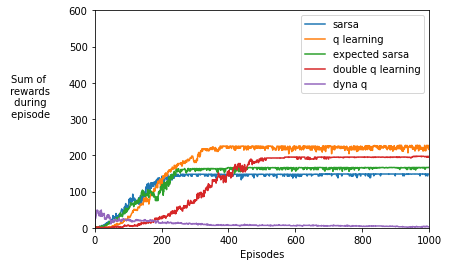

In [ ]:
from tqdm import tqdm

num_runs = 100  # The number of runs
num_episodes = 1000  # The number of episodes in each run
length_episode = 60
max_alpha = 0.001
min_alpha = 0.0001

env_info = {"grid_height": 6, "grid_width": 6}
agent_info = {"epsilon": 0.1, "target_epsilon": 0.1, "gamma": 0.95, "alpha": max_alpha, "initial_weights": 0.0,
              "num_states": 6 * 6, "num_actions": 4,
              "dimensions": 140, "is_testing": False,
              "planning_steps": 10, "terminal_state": -1, "features": np.random.randn(6 * 6, 4, 140)}


def training(env, agent):
    agent.is_testing = False

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


def testing(env, agent):
    agent.is_testing = True

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


env = GridWorldEnvironment()
# agent = QLAgent()


agent_dic = {"sarsa": SarsaAgent(), "q_learning": QLAgent(), "expected_sarsa": ExAgent(),
             "double_q_learning": DoubleQLAgent(),
             "dyna_q": DynaQAgent()}
# "q_learning_tabular": QLNFAgent()


for agent_name in agent_dic:
    print(agent_name)
    run_reward = []
    for run in tqdm(range(num_runs)):

        env.env_init(env_info)
        agent_dic[agent_name].agent_init(agent_info)


        episode_rewards = []

        for episode in range(num_episodes):
            training_reward = training(env, agent_dic[agent_name])
            testing_reward = testing(env, agent_dic[agent_name])

            agent_dic[agent_name].alpha -= (max_alpha - min_alpha) / num_episodes

            episode_rewards.append(testing_reward)

        run_reward.append(episode_rewards)

    run_reward = np.mean(np.array(run_reward), 0)

    np.save(agent_name + ".npy", run_reward)

    string_name = agent_name.replace("_", " ")
    plt.plot(run_reward, label=string_name)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode", rotation=0, labelpad=40)
plt.xlim(0, num_episodes)
plt.ylim(0, 600)
plt.legend()
plt.show()


### epsilon = 0.7




  0%|          | 0/100 [00:00<?, ?it/s]

sarsa





  1%|          | 1/100 [00:02<04:26,  2.69s/it]


  2%|▏         | 2/100 [00:05<04:23,  2.69s/it]


  3%|▎         | 3/100 [00:08<04:19,  2.68s/it]


  4%|▍         | 4/100 [00:11<04:26,  2.77s/it]


  5%|▌         | 5/100 [00:13<04:28,  2.82s/it]


  6%|▌         | 6/100 [00:16<04:27,  2.85s/it]


  7%|▋         | 7/100 [00:19<04:23,  2.84s/it]


  8%|▊         | 8/100 [00:22<04:21,  2.84s/it]


  9%|▉         | 9/100 [00:25<04:21,  2.87s/it]


 10%|█         | 10/100 [00:28<04:23,  2.93s/it]


 11%|█         | 11/100 [00:31<04:21,  2.93s/it]


 12%|█▏        | 12/100 [00:34<04:10,  2.85s/it]


 13%|█▎        | 13/100 [00:36<04:03,  2.80s/it]


 14%|█▍        | 14/100 [00:39<03:59,  2.78s/it]


 15%|█▌        | 15/100 [00:42<03:53,  2.75s/it]


 16%|█▌        | 16/100 [00:44<03:49,  2.73s/it]


 17%|█▋        | 17/100 [00:47<03:45,  2.71s/it]


 18%|█▊        | 18/100 [00:50<03:41,  2.70s/it]


 19%|█▉        | 19/100 [00:52<03:38,  2.69s/it]


 20%|██        | 20/100 [00:55<03:34,

q_learning





  1%|          | 1/100 [00:04<06:58,  4.22s/it]


  2%|▏         | 2/100 [00:08<07:00,  4.29s/it]


  3%|▎         | 3/100 [00:12<06:56,  4.29s/it]


  4%|▍         | 4/100 [00:17<06:50,  4.28s/it]


  5%|▌         | 5/100 [00:21<06:42,  4.24s/it]


  6%|▌         | 6/100 [00:25<06:35,  4.21s/it]


  7%|▋         | 7/100 [00:29<06:33,  4.23s/it]


  8%|▊         | 8/100 [00:34<06:30,  4.24s/it]


  9%|▉         | 9/100 [00:38<06:25,  4.24s/it]


 10%|█         | 10/100 [00:42<06:19,  4.22s/it]


 11%|█         | 11/100 [00:46<06:14,  4.21s/it]


 12%|█▏        | 12/100 [00:50<06:11,  4.22s/it]


 13%|█▎        | 13/100 [00:55<06:13,  4.29s/it]


 14%|█▍        | 14/100 [01:00<06:27,  4.51s/it]


 15%|█▌        | 15/100 [01:05<06:27,  4.56s/it]


 16%|█▌        | 16/100 [01:09<06:13,  4.45s/it]


 17%|█▋        | 17/100 [01:13<06:06,  4.41s/it]


 18%|█▊        | 18/100 [01:17<05:56,  4.35s/it]


 19%|█▉        | 19/100 [01:21<05:48,  4.30s/it]


 20%|██        | 20/100 [01:26<05:41,

expected_sarsa





  1%|          | 1/100 [00:10<17:19, 10.50s/it]


  2%|▏         | 2/100 [00:21<17:12, 10.53s/it]


  3%|▎         | 3/100 [00:33<17:49, 11.02s/it]


  4%|▍         | 4/100 [00:43<17:25, 10.89s/it]


  5%|▌         | 5/100 [00:54<17:07, 10.82s/it]


  6%|▌         | 6/100 [01:05<16:58, 10.83s/it]


  7%|▋         | 7/100 [01:15<16:40, 10.76s/it]


  8%|▊         | 8/100 [01:26<16:23, 10.69s/it]


  9%|▉         | 9/100 [01:37<16:11, 10.68s/it]


 10%|█         | 10/100 [01:47<15:54, 10.61s/it]


 11%|█         | 11/100 [01:57<15:29, 10.44s/it]


 12%|█▏        | 12/100 [02:07<15:08, 10.32s/it]


 13%|█▎        | 13/100 [02:17<14:48, 10.21s/it]


 14%|█▍        | 14/100 [02:27<14:29, 10.11s/it]


 15%|█▌        | 15/100 [02:37<14:15, 10.07s/it]


 16%|█▌        | 16/100 [02:47<14:04, 10.05s/it]


 17%|█▋        | 17/100 [02:57<13:52, 10.04s/it]


 18%|█▊        | 18/100 [03:07<13:42, 10.03s/it]


 19%|█▉        | 19/100 [03:17<13:28,  9.98s/it]


 20%|██        | 20/100 [03:27<13:15,

double_q_learning





  1%|          | 1/100 [00:07<13:04,  7.92s/it]


  2%|▏         | 2/100 [00:15<12:54,  7.91s/it]


  3%|▎         | 3/100 [00:23<12:45,  7.90s/it]


  4%|▍         | 4/100 [00:31<12:36,  7.88s/it]


  5%|▌         | 5/100 [00:39<12:28,  7.87s/it]


  6%|▌         | 6/100 [00:47<12:20,  7.88s/it]


  7%|▋         | 7/100 [00:55<12:12,  7.88s/it]


  8%|▊         | 8/100 [01:03<12:05,  7.89s/it]


  9%|▉         | 9/100 [01:10<11:57,  7.88s/it]


 10%|█         | 10/100 [01:18<11:48,  7.87s/it]


 11%|█         | 11/100 [01:26<11:41,  7.88s/it]


 12%|█▏        | 12/100 [01:34<11:34,  7.89s/it]


 13%|█▎        | 13/100 [01:42<11:25,  7.88s/it]


 14%|█▍        | 14/100 [01:50<11:18,  7.88s/it]


 15%|█▌        | 15/100 [01:58<11:10,  7.88s/it]


 16%|█▌        | 16/100 [02:06<11:03,  7.89s/it]


 17%|█▋        | 17/100 [02:13<10:53,  7.87s/it]


 18%|█▊        | 18/100 [02:21<10:45,  7.87s/it]


 19%|█▉        | 19/100 [02:29<10:37,  7.88s/it]


 20%|██        | 20/100 [02:37<10:30,

dyna_q





  1%|          | 1/100 [00:29<49:26, 29.96s/it]


  2%|▏         | 2/100 [01:00<49:02, 30.02s/it]


  3%|▎         | 3/100 [01:30<48:36, 30.07s/it]


  4%|▍         | 4/100 [01:59<47:54, 29.94s/it]


  5%|▌         | 5/100 [02:29<47:16, 29.86s/it]


  6%|▌         | 6/100 [02:59<46:42, 29.82s/it]


  7%|▋         | 7/100 [03:29<46:12, 29.81s/it]


  8%|▊         | 8/100 [03:58<45:40, 29.78s/it]


  9%|▉         | 9/100 [04:28<45:07, 29.75s/it]


 10%|█         | 10/100 [04:58<44:38, 29.76s/it]


 11%|█         | 11/100 [05:27<44:05, 29.72s/it]


 12%|█▏        | 12/100 [05:57<43:31, 29.68s/it]


 13%|█▎        | 13/100 [06:27<43:20, 29.90s/it]


 14%|█▍        | 14/100 [06:57<42:50, 29.88s/it]


 15%|█▌        | 15/100 [07:27<42:14, 29.82s/it]


 16%|█▌        | 16/100 [07:57<41:39, 29.76s/it]


 17%|█▋        | 17/100 [08:26<41:08, 29.74s/it]


 18%|█▊        | 18/100 [08:56<40:37, 29.72s/it]


 19%|█▉        | 19/100 [09:26<40:05, 29.70s/it]


 20%|██        | 20/100 [09:55<39:37,

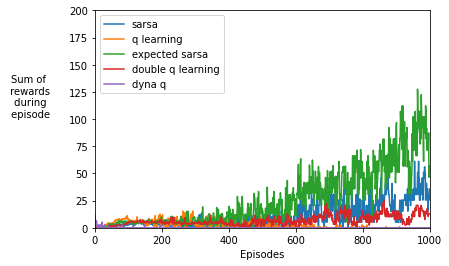

In [ ]:
from tqdm import tqdm

num_runs = 100  # The number of runs
num_episodes = 1000  # The number of episodes in each run
length_episode = 60
max_alpha = 0.001
min_alpha = 0.0001

env_info = {"grid_height": 6, "grid_width": 6}
agent_info = {"epsilon": 0.7, "target_epsilon": 0.7, "gamma": 0.95, "alpha": max_alpha, "initial_weights": 0.0,
              "num_states": 6 * 6, "num_actions": 4,
              "dimensions": 140, "is_testing": False,
              "planning_steps": 10, "terminal_state": -1, "features": np.random.randn(6 * 6, 4, 140)}


def training(env, agent):
    agent.is_testing = False

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


def testing(env, agent):
    agent.is_testing = True

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


env = GridWorldEnvironment()
# agent = QLAgent()


agent_dic = {"sarsa": SarsaAgent(), "q_learning": QLAgent(), "expected_sarsa": ExAgent(),
             "double_q_learning": DoubleQLAgent(),
             "dyna_q": DynaQAgent()}
# "q_learning_tabular": QLNFAgent()


for agent_name in agent_dic:
    print(agent_name)
    run_reward = []
    for run in tqdm(range(num_runs)):

        env.env_init(env_info)
        agent_dic[agent_name].agent_init(agent_info)


        episode_rewards = []

        for episode in range(num_episodes):
            training_reward = training(env, agent_dic[agent_name])
            testing_reward = testing(env, agent_dic[agent_name])

            agent_dic[agent_name].alpha -= (max_alpha - min_alpha) / num_episodes

            episode_rewards.append(testing_reward)


        run_reward.append(episode_rewards)

    run_reward = np.mean(np.array(run_reward), 0)

    np.save(agent_name + ".npy", run_reward)

    string_name = agent_name.replace("_", " ")
    plt.plot(run_reward, label=string_name)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode", rotation=0, labelpad=40)
plt.xlim(0, num_episodes)
plt.ylim(0, 200)
plt.legend()
plt.show()


### change alpha

## run 1x5 grid world

In [ ]:
from tqdm import tqdm

# all_reward_sums = {}  # Contains sum of rewards during episode
# all_state_visits = {}  # Contains state visit counts during the last 10 episodes
env_info = {"grid_height": 1, "grid_width": 5}
agent_info = {"epsilon": 0.5, "target_epsilon": 0.1, "gamma": 1, "alpha": 0.01, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

agent_info2 = {"epsilon": 0.5, "target_epsilon": 0.01, "gamma": 1, "alpha": 0.01, "initial_weights": 0.0,
               "num_states": 4, "num_actions": 2,
               "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100  # The number of runs
num_episodes = 50000  # The number of episodes in each run

env = SmallGridworld()

agent = SarsaAgent()
agent2 = QLAgent()

average_weight1 = []
average_weight2 = []

# for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
for alpha in [0.1]:

    agent_info["alpha"] = alpha
    agent_weight = []

    average_episode_rewards = []
    for run in tqdm(range(num_runs)):

        env.env_init(env_info)
        agent.agent_init(agent_info)

        reward_sums = []

        episode_rewards = []

        for episode in range(num_episodes):

            # Runs an episode while keeping track of visited states

            observation = env.env_start()
            action = agent.agent_start(observation)

            single_reward = 0

            is_terminal = False
            while True:
                reward, state, is_terminal = env.env_step(action)
                single_reward += reward

                if is_terminal:
                    agent.agent_end(reward)
                    break
                action = agent.agent_step(reward, state)

            episode_rewards.append(single_reward)
            env.env_cleanup()
        agent_weight.append(agent.w)
        average_episode_rewards.append(episode_rewards)

    average_episode_rewards = np.mean(np.array(average_episode_rewards), 0)
    agent_weight = np.mean(np.array(agent_weight), 0)
    average_weight1.append(agent_weight)

    agent_info2["alpha"] = alpha
    agent2_weight = []
    average_episode_rewards2 = []
    for run in tqdm(range(num_runs)):

        env.env_init(env_info)
        agent2.agent_init(agent_info2)

        reward_sums = []

        episode_rewards = []

        for episode in range(num_episodes):

            # Runs an episode while keeping track of visited states

            observation = env.env_start()
            action = agent2.agent_start(observation)

            single_reward = 0

            is_terminal = False
            while True:
                reward, state, is_terminal = env.env_step(action)
                single_reward += reward

                if is_terminal:
                    agent2.agent_end(reward)
                    break
                action = agent2.agent_step(reward, state)

            episode_rewards.append(single_reward)
            env.env_cleanup()
        agent2_weight.append(agent2.w)
        average_episode_rewards2.append(episode_rewards)

    average_episode_rewards2 = np.mean(np.array(average_episode_rewards2), 0)
    agent2_weight = np.mean(np.array(agent2_weight), 0)
    average_weight2.append(agent2_weight)

    plt.plot(average_episode_rewards, label="sarsa")
    plt.plot(average_episode_rewards2, label="q-learning")
    plt.xlabel("Episodes")
    plt.ylabel("Sum of\n rewards\n during\n episode\n with\n alpha\n" + str(alpha), rotation=0, labelpad=40)
    plt.xlim(0, num_episodes)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


In [ ]:
print(average_weight1)
print(average_weight2)

## run 1x5 grid world double q

In [ ]:
from tqdm import tqdm

# all_reward_sums = {}  # Contains sum of rewards during episode
# all_state_visits = {}  # Contains state visit counts during the last 10 episodes
env_info = {"grid_height": 1, "grid_width": 5}
agent_info = {"epsilon": 0.7, "target_epsilon": 0.01, "gamma": 1, "alpha": 0.01, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100  # The number of runs
num_episodes = 50000  # The number of episodes in each run

env = SmallGridworld()

agent = DoubleQLAgent()

average_weight1 = []

# for alpha in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
for alpha in [0.1]:

    agent_info["alpha"] = alpha
    agent_weight = []

    average_episode_rewards = []
    for run in tqdm(range(num_runs)):

        env.env_init(env_info)
        agent.agent_init(agent_info)

        reward_sums = []

        episode_rewards = []

        for episode in range(num_episodes):

            # Runs an episode while keeping track of visited states

            observation = env.env_start()
            action = agent.agent_start(observation)

            single_reward = 0

            is_terminal = False
            while True:
                reward, state, is_terminal = env.env_step(action)
                single_reward += reward

                if is_terminal:
                    agent.agent_end(reward)
                    break
                action = agent.agent_step(reward, state)

            episode_rewards.append(single_reward)
            env.env_cleanup()
        agent_weight.append(agent.w1)
        agent_weight.append(agent.w2)
        average_episode_rewards.append(episode_rewards)

    average_episode_rewards = np.mean(np.array(average_episode_rewards), 0)
    agent_weight = np.mean(np.array(agent_weight), 0)
    average_weight1.append(agent_weight)

    plt.plot(average_episode_rewards, label="double q")
    plt.xlabel("Episodes")
    plt.ylabel("Sum of\n rewards\n during\n episode\n", rotation=0, labelpad=40)
    plt.xlim(0, num_episodes)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
  
print("done")
print(average_weight1)

## run 1 x 5 grid world dyna q

In [ ]:
from tqdm import tqdm

# all_reward_sums = {}  # Contains sum of rewards during episode
# all_state_visits = {}  # Contains state visit counts during the last 10 episodes
env_info = {"grid_height": 1, "grid_width": 5}
agent_info = {"epsilon": 0.7, "target_epsilon": 0.01, "gamma": 1, "alpha": 0.00001, "initial_weights": 0.0,
              "num_states": 4, "num_actions": 2,
              "dimensions": 2, "planning_steps": 20, "terminal_state": 4, "features": np.array(
        [[[0, 1], [0.8, 0]], [[0, 0], [0.8, 0]], [[0, 0], [-1, 0]], [[0, 1], [-1, 0]]])}

num_runs = 100  # The number of runs
num_episodes = 50000 # The number of episodes in each run

env = SmallGridworld()

agent = DynaQAgent()

average_weight1 = []

agent_weight = []

average_episode_rewards = []
for run in tqdm(range(num_runs)):

    env.env_init(env_info)
    agent.agent_init(agent_info)

    reward_sums = []

    episode_rewards = []

    for episode in range(num_episodes):

        # Runs an episode while keeping track of visited states

        observation = env.env_start()
        action = agent.agent_start(observation)

        single_reward = 0

        is_terminal = False
        while True:
            reward, state, is_terminal = env.env_step(action)
            single_reward += reward

            if is_terminal:
                agent.agent_end(reward)
                break
            action = agent.agent_step(reward, state)

        episode_rewards.append(single_reward)
        env.env_cleanup()
    agent_weight.append(agent.w)
    average_episode_rewards.append(episode_rewards)

average_episode_rewards = np.mean(np.array(average_episode_rewards), 0)
agent_weight = np.mean(np.array(agent_weight), 0)
average_weight1.append(agent_weight)

plt.plot(average_episode_rewards, label="dyna")
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode\n", rotation=0, labelpad=40)
plt.xlim(0, num_episodes)
plt.ylim(0, 1)
plt.legend()
plt.show()


In [ ]:
print(agent.w)

## run 6 x 6 grid world q

In [ ]:
from tqdm import tqdm
num_runs = 30  # The number of runs
num_episodes = 50000  # The number of episodes in each run
length_episode = 60
max_alpha = 0.1
min_alpha = 0.0001

env_info = {"grid_height": 6, "grid_width": 6}
agent_info = {"epsilon": 0.7, "target_epsilon": 0.3, "gamma": 0.95, "alpha": max_alpha, "initial_weights": 0.0,
              "num_states": 6 * 6, "num_actions": 4,
              "dimensions": 6, "is_testing": False, "features": np.random.randn(6 * 6, 4, 6)}


def training(env, agent):
    agent.is_testing = False

    episode_rewards = []

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


def testing(env, agent):
    agent.is_testing = True

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


env = GridWorldEnvironment()
agent = QLAgent()

run_reward = []

for run in tqdm(range(num_runs)):

    env.env_init(env_info)
    agent.agent_init(agent_info)

    episode_rewards = []

    for episode in range(num_episodes):
        training_reward = training(env, agent)
        testing_reward = testing(env, agent)
        agent.alpha -= (max_alpha - min_alpha) / num_episodes

        episode_rewards.append(testing_reward)

        # print(testing_reward)
    run_reward.append(episode_rewards)

run_reward = np.mean(np.array(run_reward), 0)

# print(run_reward)

plt.plot(run_reward, label="q-learning")
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode", rotation=0, labelpad=40)
plt.xlim(0, num_episodes)
plt.ylim(0, 1)
plt.legend()
plt.show()


In [ ]:
print(agent.w)

## run 6 x 6 grid world sarsa

In [ ]:
from tqdm import tqdm
num_runs = 30  # The number of runs
num_episodes = 50000  # The number of episodes in each run
length_episode = 60
max_alpha = 0.1
min_alpha = 0.0001

env_info = {"grid_height": 6, "grid_width": 6}
agent_info = {"epsilon": 0.7, "target_epsilon": 0.3, "gamma": 0.95, "alpha": max_alpha, "initial_weights": 0.0,
              "num_states": 6 * 6, "num_actions": 4,
              "dimensions": 6, "is_testing": False, "features": np.random.randn(6 * 6, 4, 6)}


def training(env, agent):
    agent.is_testing = False

    episode_rewards = []

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


def testing(env, agent):
    agent.is_testing = True

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


env = GridWorldEnvironment()
agent = SarsaAgent()

run_reward = []

for run in tqdm(range(num_runs)):

    env.env_init(env_info)
    agent.agent_init(agent_info)

    episode_rewards = []

    for episode in range(num_episodes):
        training_reward = training(env, agent)
        testing_reward = testing(env, agent)
        agent.alpha -= (max_alpha - min_alpha) / num_episodes

        episode_rewards.append(testing_reward)

        # print(testing_reward)
    run_reward.append(episode_rewards)

run_reward = np.mean(np.array(run_reward), 0)

# print(run_reward)

plt.plot(run_reward, label="q-learning")
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode", rotation=0, labelpad=40)
plt.xlim(0, num_episodes)
plt.ylim(0, 1)
plt.legend()
plt.show()


In [ ]:
print(agent.w)

## run 6 x 6 gridworld ExSarsa, Behaviour Epsilon 0.7

In [ ]:
from tqdm import tqdm

num_runs = 10  # The number of runs
num_iterations = 100  # The number of episodes in each run
length_episode = 60
max_alpha = 0.1
min_alpha = 0.0001

env_info = {"grid_height": 6, "grid_width": 6}
agent_info = {"epsilon": 0.7, "target_epsilon": 0.7, "gamma": 0.95, "alpha": max_alpha, "initial_weights": 0.0,
              "num_states": 6 * 6, "num_actions": 4,
              "dimensions": 6, "is_testing": False,
              "planning_steps": 10, "terminal_state": -1, "features": np.random.randn(6 * 6, 4, 6)}


def training(env, agent):
    agent.is_testing = False

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


def testing(env, agent):
    agent.is_testing = True

    observation = env.env_start()
    action = agent.agent_start(observation)

    single_reward = 0

    for i in range(length_episode):
        reward, state, is_terminal = env.env_step(action)
        single_reward += reward

        action = agent.agent_step(reward, state)

    env.env_cleanup()

    return single_reward


env = GridWorldEnvironment()
# agent = QLAgent()

alphas_dic = ["0.1":0.1, "0.2":0.2, "0.3":0.3, "0.4":0.4, "0.5":0.5, "0.6":0.6,
              "0.7":0.7, "0.8":0.8]


for alpha in alphas_dic:
    run_reward = []
    for run in tqdm(range(num_runs)):

        env.env_init(env_info)
        agent = ExAgent()
        agent.agent_init(agent_info)
        agent.alpha = alpha
        episode_rewards = []

        for episode in range(num_episodes):
            #training_reward = training(env, agent_dic[agent_name])
            testing_reward = testing(env, agent)
            # agent.alpha -= (max_alpha - min_alpha) / num_episodes

            episode_rewards.append(testing_reward)
            # print(training_reward)
            # if testing_reward != 0:
            #     print(testing_reward)

        run_reward.append(episode_rewards)

    run_reward = np.mean(np.array(run_reward), 0)

    np.save(agent_name + ".npy", run_reward)

    string_name = agent_name.replace("_", " ")
    plt.plot(run_reward, label=string_name)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode", rotation=0, labelpad=40)
plt.xlim(0, num_episodes)
plt.ylim(0, 300)
plt.legend()
plt.show()

NameError: ignored